In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.aux_funcs import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.population import Population

In [2]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'

In [3]:
pop = Population(savepath)

In [4]:
pop.load_from_pickle(stage='unit')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_unit_update_120221.pickle


In [5]:
# pop.set_experiment('hffm')

In [6]:
# pop.summarize_sessions()

In [7]:
# pop.summarize_units()
# pop.save_as_pickle(stage='unit')

In [8]:
pop.summarize_population()
pop.save_as_pickle(stage='population')

applying activity thresholds
clustering by waveform
depth plot
contrast response
gratings response
median firing rate by stim and animal activity
movement tuning
dEye clustering
saving data to /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


<Figure size 432x288 with 0 Axes>

In [9]:
sessions = pop.data['session'].unique()

In [12]:
import matplotlib.patches as mpatches

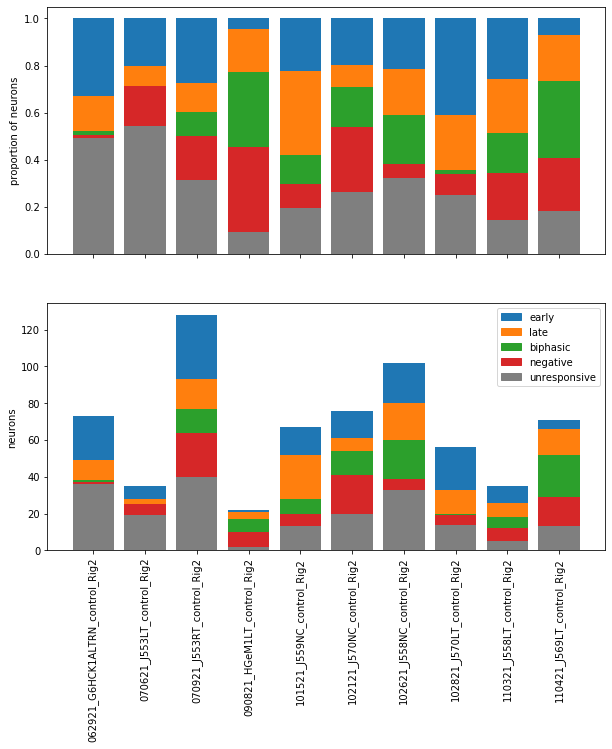

In [14]:
plt.subplots(2,1,figsize=(10,10))
plt.subplot(2,1,1)
for count, session in enumerate(sessions):
    occ = pop.data['movement_psth_type_simple'][pop.data['session']==session].value_counts() / len(pop.data[pop.data['session']==session])
    runtot = 0
    if 'unresponsive' in occ:
        plt.bar(count, bottom=runtot, height=occ['unresponsive'], color='tab:gray')
        runtot += occ['unresponsive']
    if 'negative' in occ:
        plt.bar(count, bottom=runtot, height=occ['negative'], color='tab:red')
        runtot += occ['negative']
    if 'biphasic' in occ:
        plt.bar(count, bottom=runtot, height=occ['biphasic'], color='tab:green')
        runtot += occ['biphasic']
    if 'late' in occ:
        plt.bar(count, bottom=runtot, height=occ['late'], color='tab:orange')
        runtot += occ['late']
    if 'early' in occ:
        plt.bar(count, bottom=runtot, height=occ['early'], color='tab:blue')
        runtot += occ['early']
plt.xticks(np.arange(len(sessions)), labels=[])
plt.ylabel('proportion of neurons')

plt.subplot(2,1,2)
for count, session in enumerate(sessions):
    occ = pop.data['movement_psth_type_simple'][pop.data['session']==session].value_counts()
    runtot = 0
    if 'unresponsive' in occ:
        plt.bar(count, bottom=runtot, height=occ['unresponsive'], color='tab:gray')
        runtot += occ['unresponsive']
    if 'negative' in occ:
        plt.bar(count, bottom=runtot, height=occ['negative'], color='tab:red')
        runtot += occ['negative']
    if 'biphasic' in occ:
        plt.bar(count, bottom=runtot, height=occ['biphasic'], color='tab:green')
        runtot += occ['biphasic']
    if 'late' in occ:
        plt.bar(count, bottom=runtot, height=occ['late'], color='tab:orange')
        runtot += occ['late']
    if 'early' in occ:
        plt.bar(count, bottom=runtot, height=occ['early'], color='tab:blue')
        runtot += occ['early']
plt.xticks(np.arange(len(sessions)), labels=sessions, rotation=90)
plt.ylabel('neurons')
plt.legend(handles=[mpatches.Patch(color='tab:blue', label='early'),
            mpatches.Patch(color='tab:orange', label='late'),
            mpatches.Patch(color='tab:green', label='biphasic'),
            mpatches.Patch(color='tab:red', label='negative'),
            mpatches.Patch(color='tab:gray', label='unresponsive')])

In [ ]:
late = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='early']).T
for i in range(len(late)):
    plt.plot(pop.trange_x, late, alpha=0.1)
    plt.title('data as of 120221; late cluster')
    plt.xlim([-0.2,0.4])
    plt.vlines(0.0875, -0.5, 1, color='k')

In [ ]:
cluster_mean = np.mean(late, 1)
baseline = np.nanmean(cluster_mean[:30])
p, t = pop.get_peak_trough(cluster_mean[38:50], baseline)

In [ ]:
from scipy.signal import find_peaks

In [ ]:
wv = [i-baseline for i in cluster_mean]

In [ ]:
plt.plot(wv)

In [ ]:
peaks, peak_props = find_peaks(cluster_mean, 0.1)

In [ ]:
plt.hist(pop.data['aggclust'])

In [ ]:
plt.subplots(2,3,figsize=(15,10))
for c, k in enumerate(pop.data['aggclust'].unique()):
    plt.subplot(2,3,c+1)
    this_k = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['aggclust']==k])
    for i in range(np.size(this_k, 0)):
        plt.plot(pop.trange_x, this_k[i])
    plt.plot(pop.trange_x, np.mean(this_k,0), 'k')
    plt.title(k)
    plt.xlim([-0.2,0.4])
    plt.vlines(0.0875, -0.5, 1, color='k')

In [ ]:
from scipy import stats

In [ ]:
late_k3_peaks = np.argmax(flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['aggclust']==3]),1)
print('mode', stats.mode(late_k3_peaks), 'mean', np.mean(late_k3_peaks))

In [ ]:
late_k3_peaks = np.argmax(flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['aggclust']==0]),1)
print('mode', stats.mode(late_k3_peaks), 'mean', np.mean(late_k3_peaks))

In [ ]:
np.mean([44.2917, 42.4872])

In [ ]:
43.39-38

In [ ]:
pop.trange_x[43]

In [ ]:
peaks = peaks[np.argmax(peak_props['peak_heights'])]

In [ ]:
peaks

In [ ]:
pop.data['norm_deflection_at_opp_direction_comp'][pop.data['movement_psth_type_simple']=='early']

In [ ]:
for modtype in pop.data['movement_psth_type_simple'].unique():
    print(modtype, np.sum(pop.data['movement_psth_type_simple']==modtype))

In [ ]:
biphasic = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='late'])
for i in range(np.size(biphasic, 0)):
    plt.plot(biphasic[i], alpha=0.1, color='gray')